<a href="https://colab.research.google.com/github/nortonvanz/Fundamentals/blob/main/Statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Livro Base: Estatística Prática para Cientistas de Dados - Peter Bruce & Andrew Bruce.

Manter atualizado no Github: https://github.com/nortonvanz/Fundamentals/blob/main/Statistic.ipynb

# Ciência de Dados

É transformar grandes quantidades de dados em informação, que ajude a tomar melhores decisões.

Combinação de disciplinas: matemática, estatística, ciência da computação, conhecimento de negócio.

Ex dia a dia: feed do instagram, previsão do tempo..

## Dados

Dados não estruturados (sem padrão): emails, audios, imagems, vídeos, clisckstreams..

Dados estruturados (estrutura padronizada): de bancos de dados, planilhas, sensores..

Tipos:
- Numéricos: Contínuos (float) ou Discretos (int)
- Categóricos: categorias, binários, ordinais

Variáveis preditoras (features) são usadas para prever uma variável dependente (target).

Dados de series temporais registram medições sucessivas da mesma variável.

In [1]:
#imports
import pandas                      as pd
import numpy                       as np
from scipy.stats                   import iqr
from matplotlib                    import pyplot as plt
import seaborn                     as sns

In [11]:
#Dataset para exemplificar os conceitos:
pd.options.display.float_format = '{:.2f}'.format
url = "https://raw.githubusercontent.com/nortonvanz/House-Rocket-Real-State-EDA/main/src/kc_house_data.csv" #previsão de preço de imóveis em King County #https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
df = pd.read_csv(url, low_memory=False, nrows=100).drop('id', axis=1)
print(df.shape)
df.head()

(100, 20)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


# Estatística

A estatística é a ciência que se dedica a coletar, organizar e interpretar dados.

A estatística nos ajuda a entender os dados e tomar decisões com base em dados.


Estatísticos estimam, cientistas de dados medem:
- O estatístico foca na foca na contabilização da incerteza, chama por ex "Estimativas de Localização".
- O DS foca nos objetivos concretos corporativos, já chama de "Métricas de Localização".  

Principais áreas:
 - 1 Estatística descritiva: técnicas para descrever e resumir dados.
 - 2 Estatística inferencial: tirar conclusões sobre grandes populações a partir de uma amostra.

## 1 Estatística Descritiva


É usada na EDA do projeto.

- Análise Univariada: analisa 1 var. Ex: mean, std.
- Análise Bivariada: analisa 2 vars. Ex: correlação, gráfico dispersão.
- Análise Multivariada: analisa 3 ou + vars. Ex:

Analisar dados é:

- Identificar comportamentos médios (o padrão). Ex: Quantas venda, em média, são feitas por mes?
- Identificar comportamentos discrepantes (outliers). Ex: em um mês do ano, as vendas são 2x maiores.
- Fazer comparações. Ex: nos últimos anos, a idade do cliente vem aumentando, em média.

[Datalab.net/statistics](https://datatab.net/statistics-calculator/descriptive-statistics)

### 1.1 - Métricas de Localização (Tendência Central):
Resumem os dados em um único número onde os dados estão localizados.



#### Média


Média: ponto central dos dados. Na estatística, é o "valor esperado", desde que todos os pontos tenham a mesma chance de acontecer.
- Se jogar 1k vezes um dados de 6 lados não viciado, o valor esperado é 3,5 (1+2+3+4+5+6 = 21, logo 21/6).
- Usada para dados mais homogêneos, pois é muito afetada por outliers.
  - Ex: Qual o patrimônio médio dos moradores de Seattle, onde Bill Gates mora, que tem 100B+ em patrimônio? A média aqui não resume bem a realidade, pois os 100 bilhões do Gates vão jogar a média pra cima!

In [12]:
#Qual o valor esperado para uma casa?
#10 preços:
df.price[:10]

0    221900.00
1    538000.00
2    180000.00
3    604000.00
4    510000.00
5   1225000.00
6    257500.00
7    291850.00
8    229500.00
9    323000.00
Name: price, dtype: float64

In [13]:
#média:
df.price.mean()
#Algumas casas como a de $1.225.000 puxam a média pra cima. A mediana aqui dá uma ideia melhor de centralidade.

519149.35

#### Mediana

Mediana: ponto central de uma lista ordenada. É o valor que separa a metade maior da metade menor de uma amostra.
- Se número total par, é a média dos 2 números que separam as metades.
- Usada para dados com muita variância, pois não é afetada por outliers (é robusta contra).
  - Outlier: valor muito distante de outros. Nem sempre é incorreto.  
- É o 2° quartil, ou 50° percentil.

In [14]:
#Qual o valor esperado para uma casa?
#mediana:
df.price.median()
#Robusta contra os preços outliers, dá uma boa ideia de um valor esperado de uma casa, sendo robusto contra os outliers.

433750.0

#### Moda

Moda: é o valor que mais se repete.
- Usada para saber o valor numérico ou categórico que mais se repete. Ou valores, em caso de empate.
- Ex: qual o modelo de carro mais comum? Qual a nota do produto mais comum?

In [15]:
#A maioria das casas tem quantos quartos?
df.bedrooms.mode()

0    3
Name: bedrooms, dtype: int64

### 1.2 - Medidas de Variabilidade (Dispersão)

Resumem os dados em um único número, que informa o quão espalhados estão, em torno de uma
medida de tendência central (var e std em torno da média).

A principal é o std. Var e std são sensíveis aos outliers (pois são baseados em desvios quadráticos). Percentis são robustos.


#### Variância

Variância: Indica a dispersão dos dados em torno da média. [menos usada pq muda a escala]
 - Se os valores estiverem muito espalhados, a variância será grande.
 - Ela muda a escala dos dados (eleva ao quadrado, pra não subtrair os negativos). Então se é idade, vira idade ao quadrado.

In [16]:
#preços das casas
df.price[:10]

0    221900.00
1    538000.00
2    180000.00
3    604000.00
4    510000.00
5   1225000.00
6    257500.00
7    291850.00
8    229500.00
9    323000.00
Name: price, dtype: float64

In [17]:
#Variância:
df.price.var()
#a var não diz muito, pois está sempre ao quadrado, então estamos vendo em preço ao quadrado

92721280476.59337

Parênteses:

Coeficiente de Variação: usado para comparar a variabilidade de duas ou mais vars com escalas ou unidades de medida diferentes.
                             
  - Ex: escolher 1 ação entre a X e a Y, considerando o nível de volatilidade de seus retornos.
    - X, tem média de retorno de 8% a.a, e std de 3%.  CV=37%
    - Y, tem média de retorno de 10% a.a e std de 12%. CV=120%
    - Usando o CV, posso comparar a dispersão relativa dos retornos em relação às médias. Conclui-se que Y, é muito mais volátil, logo mais arriscado que X.

- Cálculo: o quanto o std representa da média. Cálculo: (std / media) * 100.

#### Desvio Padrão

Desvio Padrão: Distância média dos meus pontos em relação à média (centro). É a raiz quadrada da variância.
- Caso dados contenham outliers, ele será distorcido da mesma forma que a média.
- Não pode ser usado para comparar vars com escalas ou unidades de medida diferentes. Usa o Coef Variação.

In [18]:
#Desvio padrão
df.price.std()
#Na média, uma casa está $ 304k distante da média, indicando uma alta variabilidade nos dados, ou seja, temos valores bem distintos.

304501.6920750907

Além do std, pode-se estimar a dispersão dos dados olhando sua distribuição:
- Quartil e Percentis:

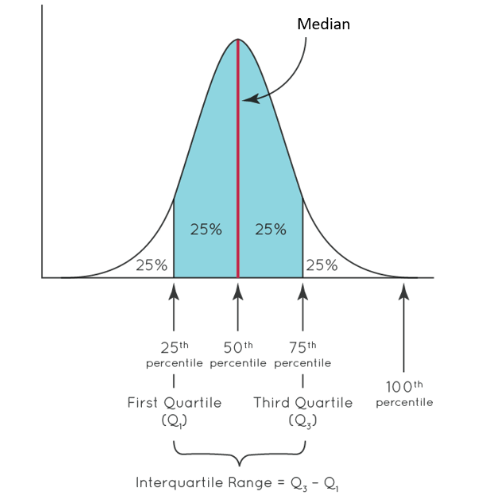

#### Quartis

Quartis:
- 3 Quartis:
 - Q1 (1º quartil) - É um **valor** calculado, em que 25% dos dados são menores e 75% dos dados são maiores.
 - Q2 (mediana) - Ou .5 quantil, ou 50º percentil.
 - Q3 (3º quartil).
- Caso eu binarize a feature, vou precisar da parte dos dados acima do 3º quartil, então faz sentido aqui criar um "Q4", que nesse contexto iria de 75 a 100º percentil.

Percentil:
- 100 percentis. 50º: [quantil .5] = [mediana (meio exato da distribuição)]

#### IQR

IQR:
- interquartile range, dif entre o 25º e o 75º percentil.
- Quanto maior, maior a variação dos dados.
- Útil pra identificar outliers: Valores abaixo de Q1 - (1.5 x IQR) ou acima de Q3 + (1.5 x IQR) são frequentemente considerados outliers. É assim que o boxplot considera.

In [19]:
#IQR:
iqr(df.price) #scipy function
#Entre o percentil 25 e o 75, temos $ 345k. Em uma distr. normal, 2/3 dos dados estariam nesta faixa.

345125.0

In [20]:
#Qual é o preço que representa Q1 (25º percentil)?
df.price.quantile(.25)
#O preço de $208k separa os 25% menores preços dos 75% maiores.

308000.0

In [21]:
# A função describe() do pandas já traz medidas de tendência central (média e mediana) e de dispersão (std, min, max, percentis):
df.price.describe(percentiles=[.1, .25, .75]) #default is [.25, .5, .75], which returns the 25th, 50th, and 75th percentiles.
#Nos 10% preços mais baixos, temos casas até $22k.

count       100.00
mean     519149.35
std      304501.69
min      153000.00
10%      229950.00
25%      308000.00
50%      433750.00
75%      653125.00
max     2000000.00
Name: price, dtype: float64

### Plots - Univariada

Análise Univariada: analisa 1 variável.

In [ ]:
#Check NAs
df.isna().sum()

In [ ]:
#tipos de dados
df.dtypes

In [ ]:
#formatar dívida atual em float.

#ajustar separador decimal:
df.divida_atual.head(3)

In [ ]:
#ajustar separador decimal, antes da conversão:
df.divida_atual = df.divida_atual.apply(lambda x: x.replace(',','.') )
df.divida_atual.head(3)

In [ ]:
#converter para float
df.divida_atual = df.divida_atual.astype(float)

In [ ]:
#ok!
df.dtypes

#### Resumo Estatística Descritiva

##### Numerical Attributes

In [25]:
num_attributes = df.select_dtypes(include=['int64', 'float64'])
num_attributes.sample(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
75,832500.00,4,4.00,3430,35102,2.00,0,0,4,10,2390,1040,1986,0,98075,47.58,-121.99,3240,35020
91,1099880.00,5,2.75,3520,6353,2.00,0,0,4,10,3520,0,2001,0,98199,47.65,-122.39,2520,6250


In [26]:
#Central tendency metrics: mean and median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
#Dispersion metrics: standard deviation, min, max, range, skew, kurtosis
d1 = pd.DataFrame ( num_attributes.apply ( np.std ) ).T
d2 = pd.DataFrame ( num_attributes.apply ( min ) ).T
d3 = pd.DataFrame ( num_attributes.apply ( max ) ).T
d4 = pd.DataFrame ( num_attributes.apply ( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame ( num_attributes.apply ( lambda x: x.skew() ) ).T
d6 = pd.DataFrame ( num_attributes.apply ( lambda x: x.kurtosis() ) ).T
#Concatenate
num_metrics = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index()
num_metrics.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ]

In [28]:
num_metrics

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,price,153000.00,2000000.00,1847000.00,519149.35,433750.00,302975.36,1.83,5.12
1,bedrooms,2.00,5.00,3.00,3.40,3.00,0.79,0.40,-0.21
2,bathrooms,1.00,4.50,3.50,2.00,2.00,0.72,0.41,0.41
3,sqft_living,770.00,5420.00,4650.00,2088.72,1930.00,856.22,1.11,1.80
4,sqft_lot,1044.00,101930.00,100886.00,11732.50,6769.50,14725.89,3.53,15.36
5,floors,1.00,3.00,2.00,1.47,1.50,0.51,0.58,-0.54
6,waterfront,0.00,1.00,1.00,0.01,0.00,0.10,10.00,100.00
7,view,0.00,4.00,4.00,0.18,0.00,0.74,4.21,17.06
8,condition,1.00,5.00,4.00,3.43,3.00,0.72,0.57,0.90
9,grade,5.00,11.00,6.00,7.61,7.00,1.04,1.01,1.61


##### Cathegorical Attributes

In [30]:
cat_attributes = df.select_dtypes(exclude=['int64', 'float64'])
cat_attributes.sample(2)

,date
28,20140624T000000
26,20140626T000000


In [31]:
#variations of each cat column
pd.set_option('max_colwidth', 150)
print(f"- Distinct values:\n{cat_attributes.apply( lambda x: x.unique().shape[0] ) } \n" )
print(f"- Variations:\n{cat_attributes.apply( lambda x: x.unique() ) } " )

- Distinct values:
date    86
dtype: int64 

- Variations:
               date
0   20141013T000000
1   20141209T000000
2   20150225T000000
3   20150218T000000
4   20140512T000000
..              ...
81  20140725T000000
82  20141223T000000
83  20140908T000000
84  20150330T000000
85  20140711T000000

[86 rows x 1 columns] 


#### Histogram

Histograma: é uma tabela de frequências divididas em bins iguais.
- Bins da var no eixo x, contagem no y.
- Essa binarização pode ajudar a descobrir relação entre features.

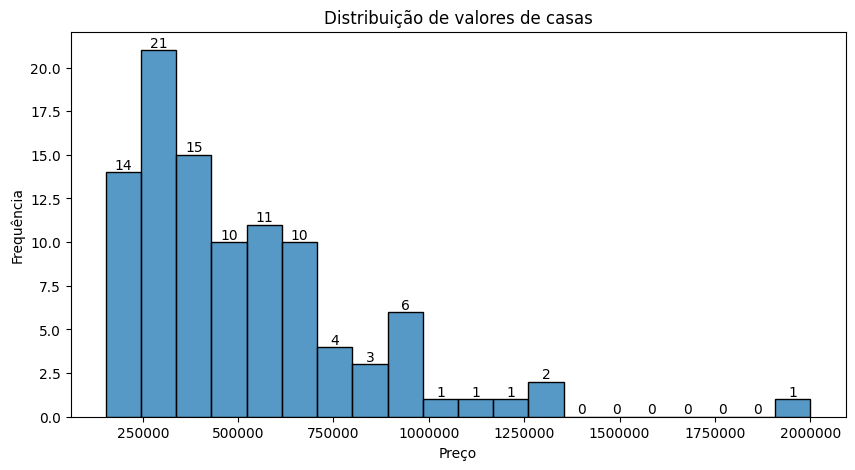

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(df['price'], bins=20, kde=False)
plt.title('Distribuição de valores de casas')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.ticklabel_format(style='plain', axis='x')
# Adicionando legendas no topo das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

#### Skew

Assimetria (skew): indica se var está concentrada em valores maiores ou menores.
- Skew negativa: se desloc p/ direita (pico na direita): concentração dos valores é alta.
- Skew positiva: se desloc p/ esqueda: concentração dos valores é baixa.
- Uma distr. normal não tem skew: média = mediana.
- Var no eixo x, densidade da probabilidade no eixo y.
 - Densidade de probabilidade: é uma medida da probabilidade de que a variável aleatória tenha um valor próximo a um ponto específico. Quanto maior a densidade em um ponto, maior a probabilidade de encontrar observações próximas a esse valor.
- Plotar através de um gráfico de densidade, que é uma versão simplificada de um histograma.

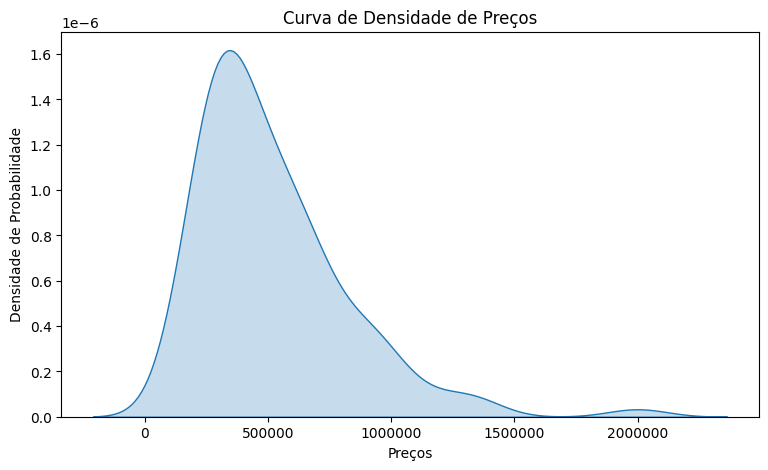

In [ ]:
# Plotar a assimetria da variável 'price'
plt.figure(figsize=(9, 5))
sns.kdeplot(df['price'], fill=True)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Curva de Densidade de Preços')
plt.xlabel('Preços')
plt.ylabel('Densidade de Probabilidade')
plt.show()
#1 × 10^(-6) = 1 ÷ 10^6 = 1 ÷ 1,000,000 = 0.000001

In [ ]:
#skew de bedrooms:
df.bedrooms.skew().round(2)

0.4

Interpretação:
- Curva deslocada para esquerda, logo concentração dos valores é baixa. Skew é positiva.
- A densidade de probabilidades é mais alta em torno de $400k, logo é maior a probabilidade de encontrarmos preços próximos a esse valor.  

#### Kurtosis

Kurtose: propensão dos dados terem valores extremos (achatamento da curva)
- Positiva: pico extremo, cauda longa
- Negativa: pico baixo, cauda curta
- Próx a zero: distribuição noramal

In [ ]:
df.price.kurt()

5.118092315921146

O gráfico de densidade mais acima já mostra a kurtose, que é alta, indicando a existência de valores extremos.

Para plotar tanto a distribuição como a densidade, usar kde=True no histplot:

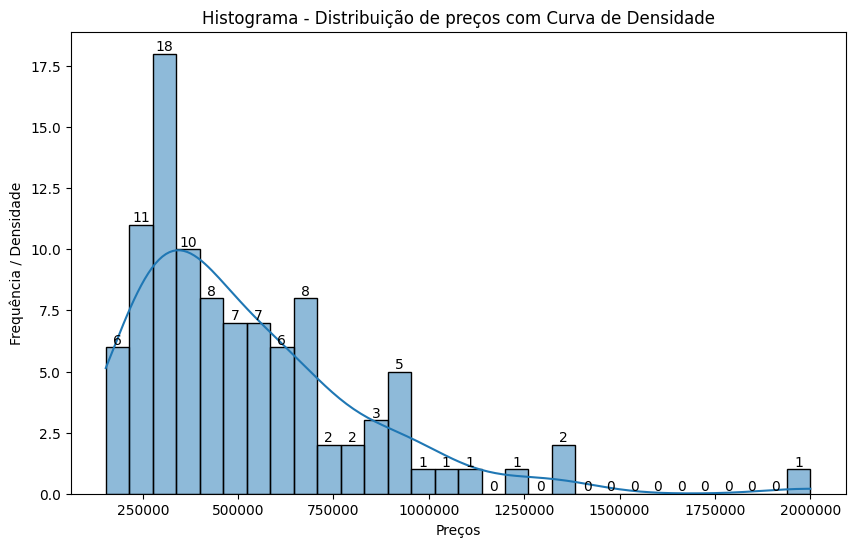

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['price'], bins=30, kde=True)
plt.title('Histograma - Distribuição de preços com Curva de Densidade')
plt.xlabel('Preços')
plt.ylabel('Frequência / Densidade')
plt.ticklabel_format(style='plain', axis='x')
# Adicionando legendas no topo das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

É possível ver acima a distribuição de frequencias, a skew e a curtose da variável 'price'.

### Plots - Bi e Multivariada



- Análise Bivariada: analisa 2 vars. Ex: correlação, gráfico dispersão.
- Análise Multivariada: analisa 3 ou + vars. Ex:

#### Correlation

Correlação: entre vars preditoras, e entre preditoras e var alvo:
- Vars X e Y são correlacionadas, se valores altos de X acompanharem valores altos de Y.
- Idem pra baixos. Se valores altos de x acompanharem valores baixo de Y, são negativamente correlacionadas.  

##### Pearson (num x num)

Coeficiente de corr de Pearson: mede a força e a direção da relação linear entre duas vars numéricas.
- Interpretação: 1=corr perfeita. -1=corr negativa perfeita. 0=ausência de corr.
- Premissas:
 - Variáveis contínuas: não é apropriado para vars categóricas ou ordinais. Sendo contínuas, as variávies podem estar em escalas diferentes.
 - Linearidade: vars tem relação linear, ou seja, ao plotar um scatterplot, pontos devem formar um padrão que possa ser aproximado por uma reta. (ver via scatterplot)
 - Ausência de outliers influentes: podem influenciar no cálculo. (ver também via scatterplot)
 - Normalidade: variávies devem seguir uma distr. normal. Isso é mais importante para a significância estatística, e menos para a interpretação do valor do coeficiente. (ver via scipy.stats.shapiro ou scipy.stats.kstest)
 - Homocedasticidade: o espalhamento dos pontos ao longo da linha de regressão deve ser homogêneo. (ver via gráfico de resíduos)
 - Independência dos dados: os dados de X e Y devem ser independentes. (ver via conhec. negócio)




In [ ]:
# Existe correlação entre o ano de construção e o tamanho do metro quadrado construído?
# Cálculo do coeficiente de correlação de Pearson
df['yr_built'].corr(df['sqft_lot'])

0.12409744324352504

O resultado indica que há bem pouca correlação entre o ano de construção e o tamanho do metro quadrado construído.

OBS: não observei se as premissas foram atendidas.

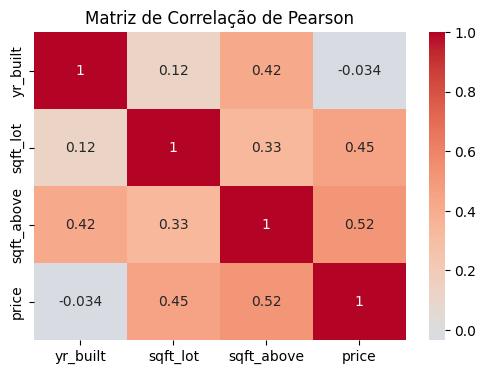

In [62]:
# Cálculo da matriz de correlação
matriz_correlacao = df[['yr_built','sqft_lot','sqft_above','price']].corr()

# Plotando a matriz de correlação com seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação de Pearson')
plt.show()

O resultado indica que há uma correlação média entre o preço e a metragem do porão.
OBS: não observei se as premissas foram atendidas.

##### Spearman (cat x num)

Coeficiente de correlação de Spearman (ρ (rho)): mostra a associação entre vars por meio de uma função não linear.
- Outras abordagens: Goodman Kruskal’s Gamma, Kendall’s Tau, Somers’ D.
- Mede a relação monotônica entre duas variávis: se aumentando x, aumenta y, ou se aumentando x, diminui y, ou se são independentes (sem relação nonotônica.).

Premissas:
- não requer que as variáveis sejam quantitativas
- não requer que a relação entre as vars seja linear
- pode ser usado para as variáveis medidas no nível ordinal
- indiferente a outliers

Requisitos:
- Se uma ou ambas as variáveis são ordinais (qualitativas), então use Spearman.
- Ref: #https://www.inf.ufsc.br/~vera.carmo/Correlacao/Correlacao_Pearson_Spearman_Kendall.pdf


In [64]:
# Existe correlação entre o ano de construção e o tamanho do metro quadrado construído?
# Cálculo do coeficiente de correlação de Spearman
df['yr_built'].corr(df['sqft_lot'], method='spearman')

0.0934247019683678

O resultado indica que há bem pouca correlação entre o ano de construção e o tamanho do metro quadrado construído.

Agora, a premissão foi atendida. Realmente a correlação entre as vars é bem baixa.

#### Correlation Matrix

#### Scatterplot (num x num)

Gráfico de Dispersão (scatterplot): mostra o relacionamento entre duas variáveis.
- Bom para um número pequeno de amostras. Usar colmeia se grande.
- Ex: ver a correlação entre yr_built e price:

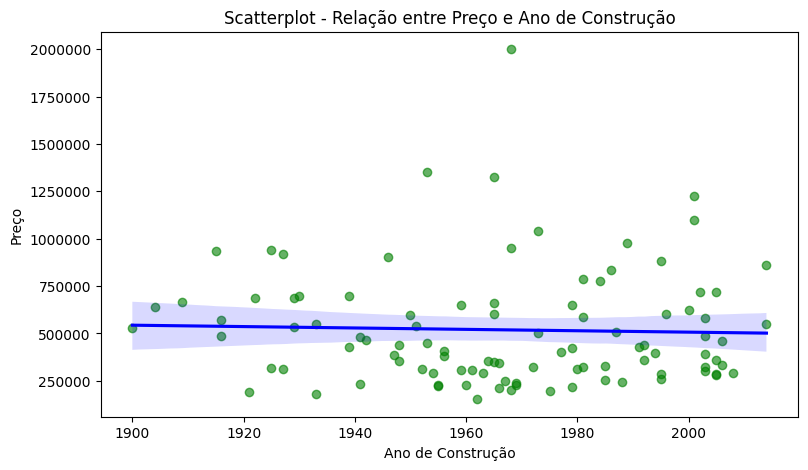

In [ ]:
# Regplot para preço vs ano de construção
  #Regplot = Scatterplot com linha de regressão, comum pois a reta de regressão ajuda a identificar padrões leneares nos dados.
plt.figure(figsize=(9, 5))
#plt.scatter(df['yr_built'], df['price'], color='green', label='Preço', alpha=0.5)
sns.regplot(x='yr_built', y='price', data=df, scatter_kws={'color': 'green', 'alpha': 0.6}, line_kws={'color': 'blue'})  #scatter + linha de regressão
plt.ticklabel_format(style='plain', axis='y')
plt.title("Scatterplot - Relação entre Preço e Ano de Construção")
plt.xlabel("Ano de Construção")
plt.ylabel("Preço")
plt.show()

Considerando a relação entre preço e ano de construção, não é visível uma tendência de aumento de preço, ao longo do tempo.

#### Contingency table (cat x cat)

Tabela de contingência: avalia a correlação entre variáveis categóricas
- Qual a correlação entre o número de quartos e a nota?

In [ ]:
#Tabela de contingência
pd.crosstab( df['bedrooms'], df['grade'] )

grade,5,6,7,8,9,10,11
bedrooms,,,,,,,
2,0,1,8,0,0,0,0
3,0,4,26,17,5,0,0
4,1,0,14,6,4,3,1
5,0,0,2,5,1,1,1


In [ ]:
# Tabela de contingência %
pd.crosstab( df['bedrooms'], df['grade'],normalize=True)
#normalize='columns' = across cols,
            #'index' = across rows,
            # True   = across entire df.

grade,5,6,7,8,9,10,11
bedrooms,,,,,,,
2,0.00,0.01,0.08,0.00,0.00,0.00,0.00
3,0.00,0.04,0.26,0.17,0.05,0.00,0.00
4,0.01,0.00,0.14,0.06,0.04,0.03,0.01
5,0.00,0.00,0.02,0.05,0.01,0.01,0.01


#### Bar (cat x num)

Gráfico de barras: comparar média, soma ou contagem de var num em diferentes categorias.

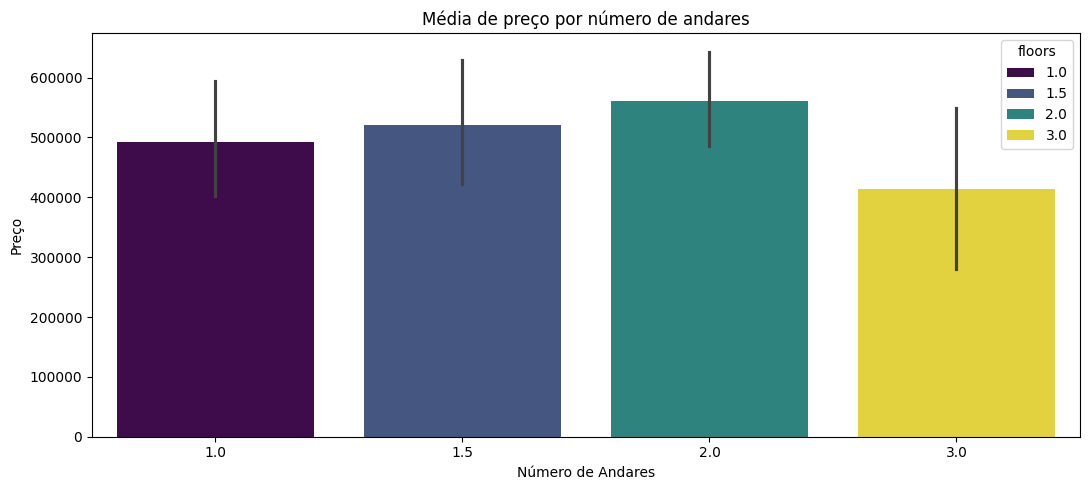

In [ ]:
#Média de preço por número de andares:
plt.figure(figsize=(11, 5));
sns.barplot(x='floors', y='price', data=df, estimator='mean', palette='viridis', hue='floors')
plt.title('Média de preço por número de andares')
plt.xlabel('Número de Andares')
plt.ylabel('Preço')
plt.tight_layout()
plt.show();

#### Boxplot (cat x num)

Boxplot: ver distribuição de var categócica vs numérica
  - Robusto contra outliers
  - Ex: Preço de casas por quantidade de pisos



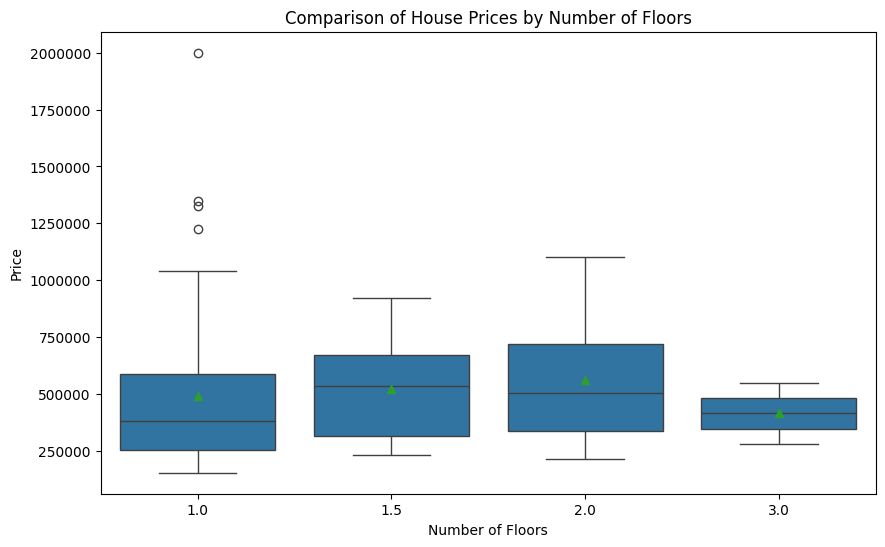

In [12]:
#Comparar casas por número de pisos:
plt.figure(figsize=(10, 6))
sns.boxplot(x='floors', y='price', data=df, showmeans=True)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Comparison of House Prices by Number of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.show()
#Com plotly express, pra ver os pontos:
#import plotly.express              as px
#fig = px.box(df, x='floors', y='price', points='all', title='Comparison of House Prices by Number of Floors')
#fig.show()

Interpretação:
- Área em azul: IQR (Q1 a Q3): parte central dos dados.
- Linha central: mediana (Q2).
 - Simetria: Se mediana + próx de Q1, skew positiva: concentração dos valores é baixa. Se de Q3, é alta.
- Triângulo verde: média.
- T-Shaped Whiskers: (IQR X 1.5)
 - É o min e max, caso não haja outliers. Ai, sup e  inf vão conter 25% dos dados.
 - Pontos fora são outliers: 'o' .

In [13]:
#Outliers: Valores abaixo de Q1 - (1.5 x IQR) ou acima de Q3 + (1.5 x IQR). Cálculo no braço deles:
Q1_ = 308000.00
Q3_ = 653125.00
IQR_ = 308000.0

print(f'Outliers: preços abaixo de: {Q1_ - (1.5 * IQR_)} ou acima de: {Q3_ + (1.5 * IQR_) }')

Outliers: preços abaixo de: -154000.0 ou acima de: 1115125.0


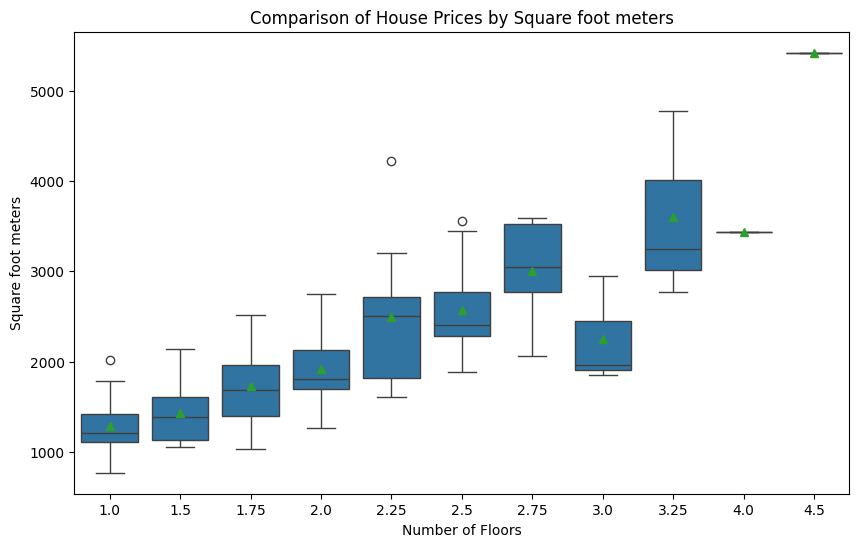

In [31]:
#Outro exemplo: Número de banheiros por metro quadrado construído:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bathrooms', y='sqft_living', data=df, showmeans=True)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Comparison of House Prices by Square foot meters')
plt.xlabel('Number of Floors')
plt.ylabel('Square foot meters')
plt.show()

Em geral, o número de banheiros aumenta, conforme a metragem construída aumenta.

#### Violin (cat x num)

Gráfico de Violino: é o boxplot com estimativas de densidade no eixo y
- Vantagem: dá melhor ideia da concentração dos dados ao longo de y.
- Desvangagem: não mostra outliers com clareza.

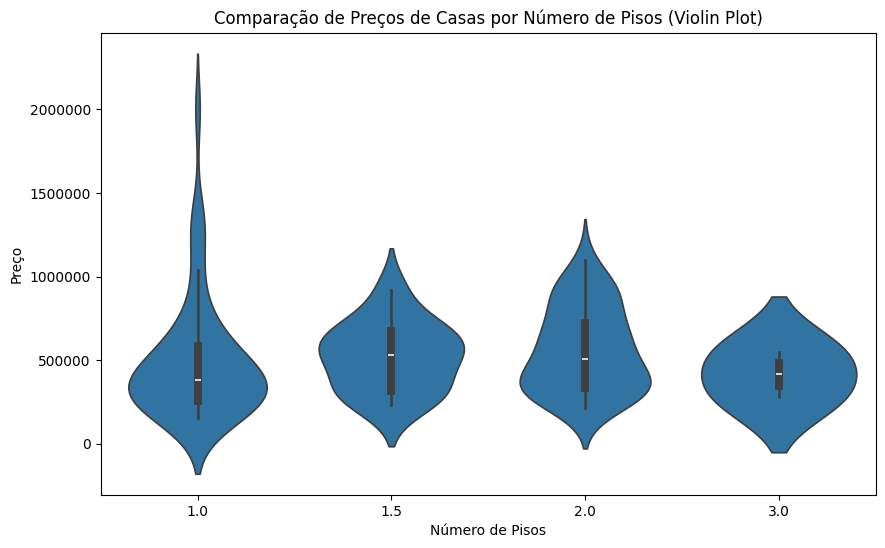

In [38]:
# Crie a figura
plt.figure(figsize=(10, 6))
sns.violinplot(x='floors', y='price', data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Comparação de Preços de Casas por Número de Pisos (Violin Plot)')
plt.xlabel('Número de Pisos')
plt.ylabel('Preço')
plt.show()

Aqui, quanto mais largo o corpo do violino, mais amostras estão concentradas naquele ponto no eixo y.

O Histograma faz a mesma coisa, porém para variáveis numéricas, binarizando.

Valor Esperado: média ponderada, onde os pessos são probabilidades.
- Cálculo: 1) multiplique os resultados pelas probabilidade de ocorrer. 2) some os valores.
- Ex: serviço de nuvem com pacote de 50/mês e de 300/mês. Faz webinars gratuítos, onde em média, 15% assinam o de 50, e 5% o de 300.
  - Valor Esperado: (0.05 * 300) + (0.015 * 50) = 22.5/mês. Esse é o valor esperado de um participante do webinar.

#### Hexbin (cat x num)

Gráfico de Colmeia: similar ao scatter (relação entre 2 vars), mas ao invés de mostrar os pontos, agrupa em hexágonos, com cor indicando o número de registros naquela área.

In [2]:
#carregar 5k pontos agora:
df2 = pd.read_csv(url, low_memory=False, nrows=5000).drop('id', axis=1)
#remover acima de 1.1m (outliers), para poder visualizar melhor:
df2 = df2.loc[df2.price < 1100000 ]
df2.shape

(4726, 20)

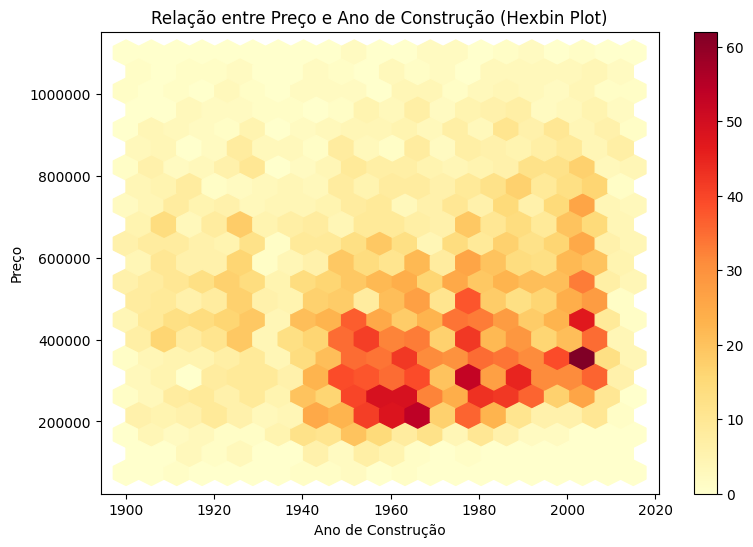

In [3]:
# Hexbin plot
plt.figure(figsize=(9, 6))
plt.hexbin(x=df2['yr_built'], y=df2['price'], gridsize=20, cmap='YlOrRd')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Relação entre Preço e Ano de Construção (Hexbin Plot)")
plt.xlabel("Ano de Construção")
plt.ylabel("Preço")
plt.colorbar();

Acima é possível ver uma fraca correlação entre preço e ano, dado que na direita do gráfico, há um pouco mais de concentração (cores escuras) na parte superior do gráfico, indicando maiores preços.

#### KDE (cat x num)

Gráfico de densidade (KDE - kernel density estimate): mapa topográfico das variáveis, onde níveis mais altos indica maior concentração.

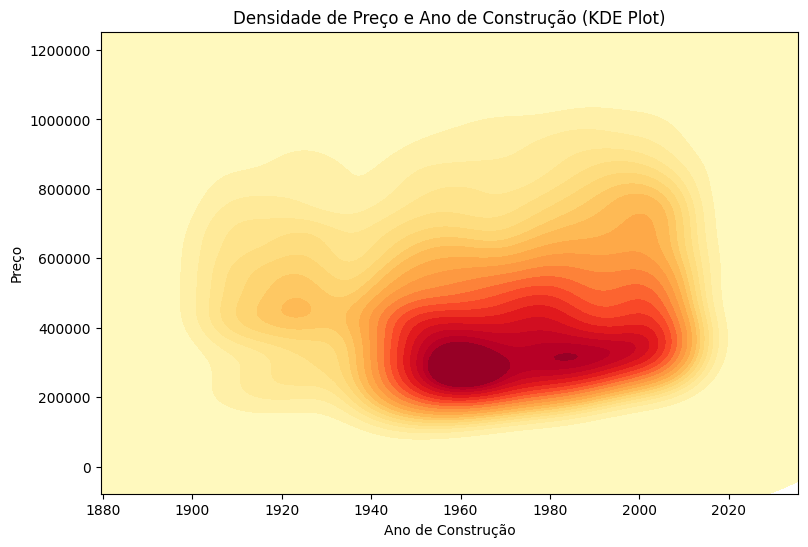

In [4]:
# KDE plot
plt.figure(figsize=(9, 6))
sns.kdeplot(x=df2['yr_built'], y=df2['price'], cmap='YlOrRd', fill=True, thresh=0, levels=20)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Densidade de Preço e Ano de Construção (KDE Plot)")
plt.xlabel("Ano de Construção")
plt.ylabel("Preço")
plt.show()

É possível ver que a maioria das amostras está concentrada em casas dos anos 60, e a maioria dos preços entre 200 a 400k.

Tabela de contingência:

## 2 Estatística Inferencial


Estatística inferencial: fazer generalizações e tirar conclusões sobre uma população a partir de uma amostra representativa.
- 'n'=amostra  |  'N'=população.
- μ (letra grega "mi")=média da população  |  x̄ (x barra)=média da amostra

Qualidade é mais importante que a quantidade, logo o DS se concentra nas amostras:
- Missings e outliers podem conter infos úteis, mas é inviável inspecionar a fundo se houver excesso.
- O cenário clássico onde big data gera valor, é quando os dados não são só grandes, mas também esparsos:
 - Ex: pesquisas do google como 1 linha de banco, palavra inglesa (150k+ em Inglês) como coluna (0 ou 1). A enorme parte das cols será zero. Resulta em matriz esparsa. Aqui, não usa amostra.
 - Por isso eu faço os estudos no banco com amostragem, não carece de big data.
- Mesmo em projetos de big data, modelos preditivos são geralmente desenv. com amostras.
 - Ex real, onde usar um subsample menor vs o um downsample com 5Mi rows, aumentou o AUC só na terceira casa decimal: ([Kaggle s4e7 - You don't need all the samples](https://www.kaggle.com/competitions/playground-series-s4e7/discussion/517167)

Técnicas de seleção de amostras:
- Amostragem Aleatória: amostra aleatoriamente obtida da população.
- Amostragem Estratificada: divide a população em estratos (subgrupos), e faz amostragens aleatórias em cada estrtato.
 - Usada quando precisa garantir que todos os estratos sejam representados.
  - Ex: train_test_split p/ classificação. Ou p/ saber intenções de voto de subgrupos, como evangélicos.

Amostragem com reposição: observações são devolvidas à população após cada extração. Se sem reposição, não são devolvidas.



**Vieses:**

Viés de amostragem: uma amostra que não representa a população.
 - Notas de restaurantes no Google, Tripadvisor.. tendem ao víes, não indicando a situação real, pois quem avalia não é aleatoriamente selecionado.

Viés de seleção: escolher dados de forma seletiva, com ou sem intenção, levando a conclusão enganosa.
- Ex: Dados selecinados a dedo: No caso de avaliações de clientes, ocorre de alguns estabelecimentos pedirem ativamente uma avaliação só pra quem elogiou/foi bem atendido.
- Também gerado por: amostragem não aleatória (viés de amostragem), e seleção de intervalos de tempo que acentuam um efeito estatístico específico.


### Variabilidade Amostral

Variabilidade Amostral:
- Uma amostra é extraída da população para medir algo ou modelar algo. Mas como nossa estimativa ou modelo se baseia em uma amostra, pode ser um erro. A distribuição poderia ser diferente, se extraíssemos uma amostra diferente?
Logo, é uma preocupação chave a variabilidade amostral.
- Será estimada com bootstrap, na prática. TLC e EP são citados antes abaixo, só para conhecimento.

Teorema de limite central (TLC):
- TLC: A distribuição das médias amostrais tende a uma normal, conforme o tamanho das amostras cresce, mesmo que a distr. original da população não seja normal.
- Como converge numa normal, possibilita a aplicação de testes de hipótese e construção de intervalos de confiança, para fazer inferências sobre a população.
- Testes de hipótese formal e intervalos de confianca tem um pequeno papel na ciência de dados, e podem ser obtidos através do bootstrap (com menos premissas), logo o teorema é menos relevante na prática de ciência de dados.

Erro padrão (EP):
- EP: métrica única que resume a variabilidade de uma estatística amostral (ex: média).
- Serve para indicar por ex quão bem a média de uma amostra representa a média da população. Um erro-parão menor indica que a média amostral é uma estimativa mais precisa da média populacional.
- Na prática, o bootstrap se tornou o modo padrão de estimar o erro-padrão, pois pode ser usado pra praticamente qualquer estatística e não se baseia no TLC ou suposições distribucionais.
- Tem origem no TLC, e serve para construção de intervalos de confiança, e testes de hipótese (como o teste t).
- Difere do STD, que mede a variabilidade de pontos de dados individuais.


### Bootstrap

Bootstrap: método de amostragem com repetição, que permite estimar a distribuição (variabilidade) de uma estatística (como a média) a partir de uma amostra.
- Não requer distribuição normal dos dados, logo é muito útil.
- Ele não compensa pequenos tamanhos de amostra, nem preenche buracos em um dataset existente. Meramente informa sobre como diversas amostras adicionais se comportariam ao serem extraídas de uma população.
- Permite estimar a distribuição de uma variedade de estatísticas, como medianas, variâncias, quantis, e até mesmo estatísticas mais complexas (ex: NPS).
- A Random Forest usa bagging, que é a abreviação de bootstrap aggregating, para aumentar seu poder preditivo: ao setar 100 árvores, cada uma é treinada sobre 1 amostra bootstrap, é podada rasa, e é tirada uma média das previsões das árvores pra regressão, e votação pra classif. Ver bootstrap multivariado, onde linhas (contendo vários valores de features) são amostradas como unidades.
- Faz amostragem com repetição. Não misturar com "reamostragem", onde em permutação combina amostras, e pode ser feita sem reposição (detalhes mais adinate).

Útil para:
- Intervalos de Confiança:
 - Serve para entender o potencial erro de uma estimativa de amostra, e avaliar se uma amostra maior é necessária.
 - Ex: temos 95% de confiança de que a verdadeira média da população está entre [47.2 e 50.6].
 - Estes 95% são o nível de confiança. Quanto maior o nível, maior o intervalo.
 - O intervalo nesse exemplo, abrange os 95% pontos centrais da distribuição da média.
- Testes de Hipóteses:
 - Ex: testar se com um nível de confiança de 95% (por ex), "A média da população é diferente de 50". Detalhado mais abaixo.



In [58]:
#implementar o bootstrap em Python para estimar a média e o intervalo de confiança de uma amostra, e também realizar um teste de hipótese:

np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)
# Quanto mais interações, mais precisa será a estimativa do erro-padrão, ou do intervalo de confiança.

print(f'Gerada uma amostra aleatória (seed fixo) de 100 dados normalmente distribuídos, com média 50 e desvio padrão 10')
print(f'Exemplo de alguns dos 100 pontos gerados: {data[:5]}')

Gerada uma amostra aleatória (seed fixo) de 100 dados normalmente distribuídos, com média 50 e desvio padrão 10
Exemplo de alguns dos 100 pontos gerados: [54.96714153 48.61735699 56.47688538 65.23029856 47.65846625]


In [59]:
# Função para realizar o bootstrap: gera várias amostras (num_samples) com reposição e calcula a média de cada amostra.
def bootstrap(data, num_samples=100):
    n = len(data)
    samples = np.random.choice(data, (num_samples, n), replace=True)
    means = np.mean(samples, axis=1)
    return means

# Realizando o bootstrap
bootstrap_means = bootstrap(data)
print(f'A partir do conjunto original de 100 pontos, foram geradas {len(bootstrap_means)} amostras bootstrap, cada uma selecionando 100 pontos aleatoriamente (podendo ser repetidos) com reposição. \nFoi calculada então a média de cada grupo de 100 pontos. Exemplos: {bootstrap_means[:5]}')

A partir do conjunto original de 100 pontos, foram geradas 100 amostras bootstrap, cada uma selecionando 100 pontos aleatoriamente (podendo ser repetidos) com reposição. 
Foi calculada então a média de cada grupo de 100 pontos. Exemplos: [48.88660717 48.72053516 48.42534363 48.79683588 47.69467533]


##### Intervalo de confiança

Média da amostra: 48.96 (linha em vermelho).
Margem de erro: ± 1.55.
Intervalo de confiança: temos 95% de confiança de que a verdadeira média da população está entre [47.4  50.51] (linhas em verde).
- Se repetíssemos o processo de amostragem muitas vezes, aproximadamente 95% dos intervalos calculados conterão a verdadeira média da população.


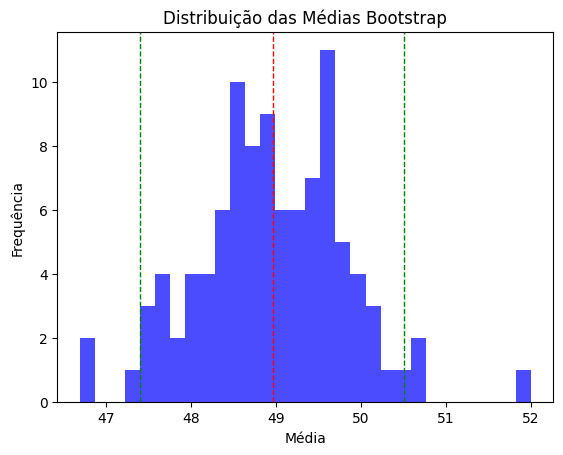

In [61]:
# Calculando o intervalo de confiança
conf_interval = np.percentile(bootstrap_means, [2.5, 97.5]) #Esses valores representam os percentis que definem o intervalo de confiança de 95%.
# Arredondando o intervalo de confiança para 2 casas decimais
conf_interval = np.round(conf_interval, 2)

# Calculando a margem de erro: é a diferença entre a média amostral e os limites do intervalo de confiança.
margin_of_error = (conf_interval[1] - conf_interval[0]) / 2
  #é calculada como a metade da largura do intervalo de confiança

# Resultados
print(f"Média da amostra: {round(np.mean(data),2)} (linha em vermelho).")
print(f"Margem de erro: ± {round(margin_of_error, 2)}.")
print(f"Intervalo de confiança: temos 95% de confiança de que a verdadeira média da população está entre {conf_interval} (linhas em verde).")
print(f"- Se repetíssemos o processo de amostragem muitas vezes, aproximadamente 95% dos intervalos calculados conterão a verdadeira média da população.")


# Visualizando a distribuição das médias bootstrap: Um histograma das médias bootstrap é plotado, com linhas verticais indicando a média da amostra original e os limites do intervalo de confiança.
plt.hist(bootstrap_means, bins=30, alpha=0.7, color='blue')
plt.axvline(np.mean(data), color='red', linestyle='dashed', linewidth=1)
plt.axvline(conf_interval[0], color='green', linestyle='dashed', linewidth=1)
plt.axvline(conf_interval[1], color='green', linestyle='dashed', linewidth=1)
plt.title('Distribuição das Médias Bootstrap')
plt.xlabel('Média')
plt.ylabel('Frequência')
plt.show()

Isto é útil, por exemplo, para dizer que temos 95% de confiança de que a verdadeira nota NPS do grupo A está entre 60 e 62, e do grupo B de 65 a 67. Logo, afirmamos que B tem NPS maior que A, pois está fora da margem de erro.

Ao usar 10k pontos na amostra, e 10k iterações no bootstrap, reduzimos a variação do intervalo de confiança, e logo a margem de erro, obtendo uma média da amostra mais próxima da média real da população:
- Média da amostra: 49.97 (linha em vermelho).
- Margem de erro: ± 0.2.
- Intervalo de confiança: temos 95% de confiança de que a verdadeira média da população está entre [49.78 50.18] (linhas em verde).


##### Teste de Hipótese

- Hipótese Nula (H₀): A afirmação inicial que se presume verdadeira até que evidências contrárias sejam apresentadas. Geralmente, representa a ideia de "nenhum efeito" ou "nenhuma diferença".
 - Ex: Testar se a média de uma população é diferente de 50.

- Hipótese Alternativa (H₁ ou Ha): A afirmação que será aceita se as evidências contrárias à hipótese nula forem suficientemente fortes. Representa a ideia de "algum efeito" ou "alguma diferença".

No cenário abaixo:
- H₀ (nula): A média da população é 50.
- H₁ (alternativa): A média da população não é 50.
- Nível de significância (α) = 0,05 (nível de confiança de 95%)
 - Um α = 0,05 significa que você está disposto a aceitar uma probabilidade de 5% de cometer um erro do tipo I: rejeitar a hipótese nula (H₀) quando ela é verdadeira.

In [5]:
#aproveita o código já gerado acima do bootstrap:
print(f'A partir do conjunto original de 100 pontos, foram geradas {len(bootstrap_means)} amostras bootstrap, cada uma selecionando 100 pontos aleatoriamente (podendo ser repetidos) com reposição. \nFoi calculada então a média de cada grupo de 100 pontos. Exemplos: {bootstrap_means[:5]}')

A partir do conjunto original de 100 pontos, foram geradas 1000 amostras bootstrap, cada uma selecionando 100 pontos aleatoriamente (podendo ser repetidos) com reposição. 
Foi calculada então a média de cada grupo de 100 pontos. Exemplos: [48.88660717 48.72053516 48.42534363 48.79683588 47.69467533]


In [6]:
# Definindo a média sob a hipótese nula
hypothesized_mean = 50  # Hipótese nula
# Calculando a média da nova amostra
observed_mean = np.mean(data)

# Ajustando a distribuição bootstrap para simular a hipótese nula
bootstrap_means_null = bootstrap_means - np.mean(bootstrap_means) + hypothesized_mean
# Calculando o valor-p corretamente: Vamos calcular a proporção de amostras bootstrap sob a hipótese nula cuja média é mais extrema do que a média observada
p_value = np.mean(bootstrap_means_null >= observed_mean)


# Resultados
print(f"Média da amostra: {observed_mean}")
print(f"Valor-p: {p_value}")

# Interpretação do valor-p
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: a média da população é significativamente diferente de 50.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que a média da população é diferente de 50.")

Média da amostra: 48.96153482605907
Valor-p: 0.877
Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que a média da população é diferente de 50.


Alterando agora a média dos 100 dados gerados 53, mantendo o std 100:

In [7]:
np.random.seed(42)
new_data = np.random.normal(loc=53, scale=10, size=100)  # Média elevada para forçar a rejeição da H0
print(f'Gerada uma amostra aleatória de 100 dados normalmente distribuídos, com média 53 e desvio padrão 10')
print(f'Exemplo de alguns dos 100 pontos gerados: {new_data[:5]}')

Gerada uma amostra aleatória de 100 dados normalmente distribuídos, com média 53 e desvio padrão 10
Exemplo de alguns dos 100 pontos gerados: [57.96714153 51.61735699 59.47688538 68.23029856 50.65846625]


In [8]:
# Realizando o bootstrap novamente, com os novos dados:
bootstrap_means = bootstrap(new_data)
print(f'A partir do conjunto original de 100 pontos, foram geradas {len(bootstrap_means)} amostras bootstrap, cada uma selecionando 100 pontos aleatoriamente (podendo ser repetidos) com reposição. \nFoi calculada então a média de cada grupo de 100 pontos. Exemplos: {bootstrap_means[:5]}')

A partir do conjunto original de 100 pontos, foram geradas 1000 amostras bootstrap, cada uma selecionando 100 pontos aleatoriamente (podendo ser repetidos) com reposição. 
Foi calculada então a média de cada grupo de 100 pontos. Exemplos: [51.88660717 51.72053516 51.42534363 51.79683588 50.69467533]


É possível ver agora que as amostras do bootstrap geram médias um pouco mais altas que as anteriores, dado que a média agora é 53.

In [9]:
# Definindo a média sob a hipótese nula
hypothesized_mean = 50  # Hipótese nula
# Calculando a média da nova amostra:
observed_mean = np.mean(new_data)

# Ajustando a distribuição bootstrap para simular a hipótese nula
bootstrap_means_null = bootstrap_means - np.mean(bootstrap_means) + hypothesized_mean
# Calculando o valor-p corretamente: Vamos calcular a proporção de amostras bootstrap sob a hipótese nula cuja média é mais extrema do que a média observada
p_value = np.mean(bootstrap_means_null >= observed_mean)

# Resultados
print(f"Média da amostra: {observed_mean}")
print(f"Valor-p: {p_value}")

# Interpretação do valor-p
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: a média da população é significativamente diferente de 50.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que a média da população é diferente de 50.")

Média da amostra: 51.96153482605907
Valor-p: 0.012
Rejeitamos a hipótese nula: a média da população é significativamente diferente de 50.


Agora, é possível afirmar nível de confiança de 95% que: a média da população é significativamente diferente de 50.

Poderia também utilizar o teste t, ao invés do bootstrap aqui, mas ele tem a normalidade como premissa, o que dificulta.

### Distribuições

Regressão à média:
- Observações extremas tendem a ser seguidas pelas mais centrais.

#### Normal

#### Cauda Longa

#### t de Student

#### Binomial

#### Poisson

#### Exponencial

#### Weibull